In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

https://archive.ics.uci.edu/ml/datasets/Student+Performance


Source:

Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez


Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [ ]:
df = pd.read_csv('/content/student-mat.csv',sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
cat_lst = df.select_dtypes(include = 'object').columns
num_lst = [col for col in df.columns if col not in cat_lst]

In [ ]:
cat_lst

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [ ]:
num_lst

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
cat_dummy = pd.get_dummies(df[cat_lst],drop_first = True)
df = pd.concat([cat_dummy, df[num_lst]], axis = 1)

In [ ]:
y = df['G2']
X = df.drop(['G2','G3'], axis = 1)

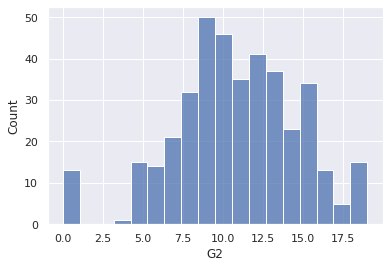

In [ ]:
sns.set_theme()
sns.histplot(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
lr = LinearRegression()
#lr.fit(X_train, y_train)
print('training cv error: ', cross_val_score(lr, X_train, y_train, cv = 10))

training cv error:  [0.54486441 0.54029511 0.63695348 0.74469897 0.72846347 0.74845341
 0.32655115 0.79806297 0.76953498 0.76128222]


In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

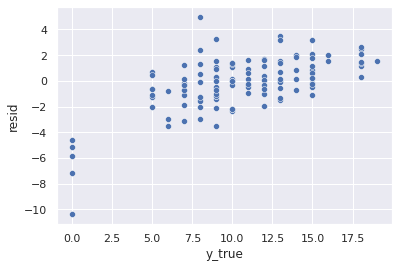

In [ ]:
y_pred = lr.predict(X_test)
resid = y_test - y_pred
eval_df = pd.DataFrame({'resid':resid,'y_true':y_test})
sns.scatterplot(data = eval_df, x = 'y_true', y = 'resid')

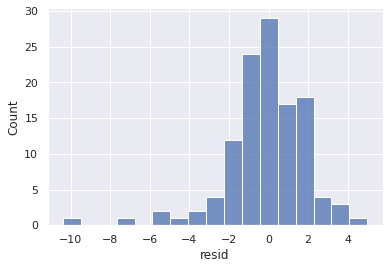

In [ ]:
sns.histplot(data = eval_df, x = 'resid')

In [ ]:
print(f"MSE Linear Regression: {mean_squared_error(y_test, y_pred)} \n")

MSE Linear Regression: 4.3349145580672 



### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtreg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
dtreg1.fit(X_train, y_train)
y_pred = dtreg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


dtreg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
dtreg2.fit(X_train, y_train)
y_pred2 = dtreg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred2)} \n")

MSE reg1: 8.656910447820403 

MSE reg2: 8.159663865546218 



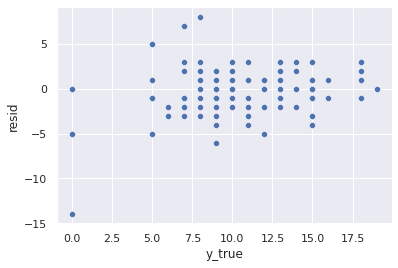

In [ ]:
resid = y_test - y_pred2
eval_df = pd.DataFrame({'resid':resid,'y_true':y_test})
sns.scatterplot(data = eval_df, x = 'y_true', y = 'resid')

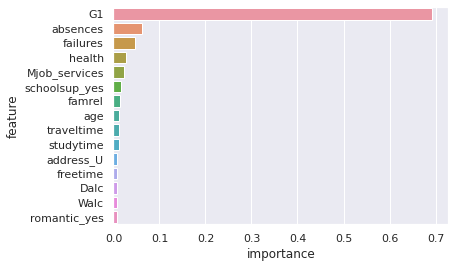

In [ ]:
feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':dtreg2.feature_importances_})
plot_df = feat_df.sort_values('importance', ascending = False)
partial_df = plot_df.iloc[:15,:]
sns.barplot(data = partial_df, y = 'feature', x = 'importance')

### Random Forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
fr = RandomForestRegressor(n_estimators = 100, max_depth = 8, random_state = 0)
fr.fit(X_train, y_train)
y_pred = fr.predict(X_test)
resid_forest = y_test - y_pred
resid_forest.describe()

count    119.000000
mean       0.111443
std        2.095127
min      -12.569447
25%       -0.861963
50%        0.250177
75%        1.095780
max        5.603333
Name: G2, dtype: float64

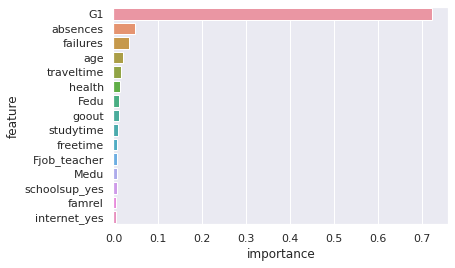

In [ ]:
feat_df = pd.DataFrame({'feature':X_train.columns, 'importance':fr.feature_importances_})
plot_df = feat_df.sort_values('importance', ascending = False)
partial_df = plot_df.iloc[:15,:]
sns.barplot(data = partial_df, y = 'feature', x = 'importance')

In [ ]:
feat_df.nlargest(3, 'importance')

,feature,importance
39,G1,0.722732
38,absences,0.049131
31,failures,0.034509


In [ ]:
print(f"MSE Random Forest Regressor: {mean_squared_error(y_test, y_pred)} \n")

MSE Random Forest Regressor: 4.365090116769707 



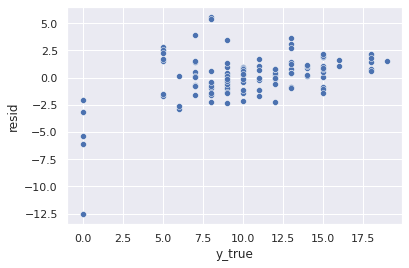

In [ ]:
resid = y_test - y_pred
eval_df = pd.DataFrame({'resid':resid,'y_true':y_test})
sns.scatterplot(data = eval_df, x = 'y_true', y = 'resid')